In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import sqlite3
import os
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn import metrics
import statsmodels.api as sm
import dtreeviz
import matplotlib.font_manager
import scipy as sp
import warnings
import math

In [2]:
print(os.getcwd())
os.chdir('./../')
print(os.getcwd())

c:\Users\ghost\OneDrive\PC_Casa\Ciencia_Datos_IA\2024-2025\2n Cuatri\Introducción a la Ciencia de Datos\Actividades\Portfolio\Practica2\enunciados
c:\Users\ghost\OneDrive\PC_Casa\Ciencia_Datos_IA\2024-2025\2n Cuatri\Introducción a la Ciencia de Datos\Actividades\Portfolio\Practica2


In [3]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

In [4]:
# Configuraciones
# ------------------------------------------------------
pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:.2f}'.format
warnings.filterwarnings('ignore')

plt.style.use("seaborn-v0_8-talk")
plt.rc("figure", autolayout=True, figsize=(11, 5))
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)
plot_params = dict(
    markeredgecolor="0.25",
    markerfacecolor="0.25",
    legend=True,
)

# Funciones

In [5]:
def metricas_evaluacion(y_test, y_pred, printed=True):
    if printed:
        print('Mean Absolute Error:', metrics.mean_absolute_error(y_test,y_pred))
        print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
        print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
        print('r2_score:', metrics.r2_score(y_test,y_pred))
        print('MAPE:', metrics.mean_absolute_percentage_error(y_test,y_pred))
        return None
    else:
        return metrics.mean_absolute_error(y_test,y_pred)

In [6]:
def plot_train_test_predict(y_train, y_test, y_pred):
    fig, ax = plt.subplots(1, 1, figsize=(7, 4))
    y_train.plot(**plot_params, ax=ax, color='blue', alpha=0.5, label='Train')
    y_test.plot(**plot_params, ax=ax, color='grey', alpha=0.5, label='Test')
    y_pred = pd.Series(y_pred, index=y_test.index)
    y_pred.plot(**plot_params, ax=ax, color='r', label='Predict')
    mae = metricas_evaluacion(y_test, y_pred, printed=False)
    fig.suptitle(f"Predicción de uso de bicicletas, MAE {mae:.2f}")
    plt.legend(loc=0)
    plt.xticks(rotation=70)
    plt.show()

# Carga de datos

In [7]:
df = pd.read_csv('./data/processed/usobarriosmeteo.csv')
df.tail()

,prec,vmax,vv,hr,ta,tpr,tamin,tamax,fecha,uso_bici,name,hora,dia,mes,anio,dia_nombre,dia_semana,findesemana
668,0.00,8.60,2.00,81.00,14.10,10.90,13.70,14.10,2025-03-03 06:00:00+00:00,2.00,CAMPANAR,6,3,3,2025,Monday,0,0
669,0.00,9.20,2.10,81.00,14.30,11.10,14.10,14.40,2025-03-03 07:00:00+00:00,5.00,CAMPANAR,7,3,3,2025,Monday,0,0
670,0.60,9.30,2.20,81.00,14.10,10.90,14.10,14.40,2025-03-03 08:00:00+00:00,10.00,CAMPANAR,8,3,3,2025,Monday,0,0
671,1.50,8.00,2.30,81.00,14.30,11.10,14.00,14.40,2025-03-03 09:00:00+00:00,8.00,CAMPANAR,9,3,3,2025,Monday,0,0
672,1.20,9.70,2.90,81.00,14.40,11.20,14.20,14.40,2025-03-03 10:00:00+00:00,3.00,CAMPANAR,10,3,3,2025,Monday,0,0


In [8]:
df['fecha'] = pd.to_datetime(df['fecha'])
df.sort_values('fecha', inplace=True)
df.tail()

,prec,vmax,vv,hr,ta,tpr,tamin,tamax,fecha,uso_bici,name,hora,dia,mes,anio,dia_nombre,dia_semana,findesemana
668,0.00,8.60,2.00,81.00,14.10,10.90,13.70,14.10,2025-03-03 06:00:00+00:00,2.00,CAMPANAR,6,3,3,2025,Monday,0,0
669,0.00,9.20,2.10,81.00,14.30,11.10,14.10,14.40,2025-03-03 07:00:00+00:00,5.00,CAMPANAR,7,3,3,2025,Monday,0,0
670,0.60,9.30,2.20,81.00,14.10,10.90,14.10,14.40,2025-03-03 08:00:00+00:00,10.00,CAMPANAR,8,3,3,2025,Monday,0,0
671,1.50,8.00,2.30,81.00,14.30,11.10,14.00,14.40,2025-03-03 09:00:00+00:00,8.00,CAMPANAR,9,3,3,2025,Monday,0,0
672,1.20,9.70,2.90,81.00,14.40,11.20,14.20,14.40,2025-03-03 10:00:00+00:00,3.00,CAMPANAR,10,3,3,2025,Monday,0,0


In [9]:
df.columns

Index(['prec', 'vmax', 'vv', 'hr', 'ta', 'tpr', 'tamin', 'tamax', 'fecha',
       'uso_bici', 'name', 'hora', 'dia', 'mes', 'anio', 'dia_nombre',
       'dia_semana', 'findesemana'],
      dtype='object')

In [10]:
df = df.loc[df['name']=='CAMPANAR'].copy()
df.sort_values('fecha', inplace=True)
df.shape

(673, 18)

# Separar train test

In [11]:
X = df.loc[:, ['hora', 'dia']]
y = df['uso_bici']
X.shape, y.shape

((673, 2), (673,))

In [12]:
res_split = train_test_split(X, y, random_state=22, shuffle=False)
X_train, X_test, y_train, y_test = res_split

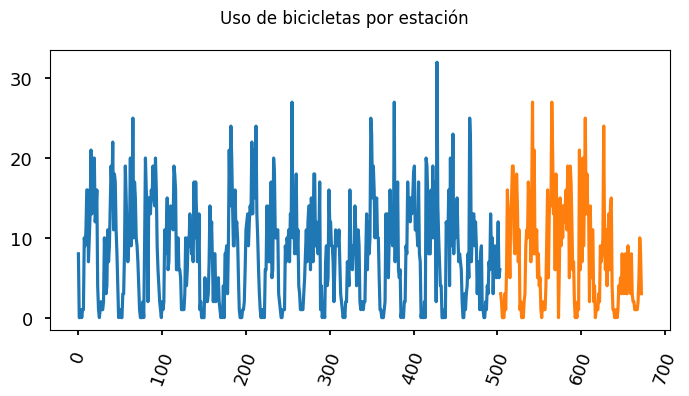

In [13]:
fig, ax = plt.subplots(1, 1, figsize=(7, 4))
ax.plot(X_train.index, y_train)
ax.plot(X_test.index, y_test)
fig.suptitle("Uso de bicicletas por estación")
plt.xticks(rotation=70)
plt.show()

# Baseline

In [14]:
y_pred = np.ones_like(y_test)
y_pred.fill(y_train.mean())
y_pred

array([8.25992063, 8.25992063, 8.25992063, 8.25992063, 8.25992063,
       8.25992063, 8.25992063, 8.25992063, 8.25992063, 8.25992063,
       8.25992063, 8.25992063, 8.25992063, 8.25992063, 8.25992063,
       8.25992063, 8.25992063, 8.25992063, 8.25992063, 8.25992063,
       8.25992063, 8.25992063, 8.25992063, 8.25992063, 8.25992063,
       8.25992063, 8.25992063, 8.25992063, 8.25992063, 8.25992063,
       8.25992063, 8.25992063, 8.25992063, 8.25992063, 8.25992063,
       8.25992063, 8.25992063, 8.25992063, 8.25992063, 8.25992063,
       8.25992063, 8.25992063, 8.25992063, 8.25992063, 8.25992063,
       8.25992063, 8.25992063, 8.25992063, 8.25992063, 8.25992063,
       8.25992063, 8.25992063, 8.25992063, 8.25992063, 8.25992063,
       8.25992063, 8.25992063, 8.25992063, 8.25992063, 8.25992063,
       8.25992063, 8.25992063, 8.25992063, 8.25992063, 8.25992063,
       8.25992063, 8.25992063, 8.25992063, 8.25992063, 8.25992063,
       8.25992063, 8.25992063, 8.25992063, 8.25992063, 8.25992

In [15]:
metricas_evaluacion(y_test, y_pred)

Mean Absolute Error: 5.461409317178548
Mean Squared Error: 41.80957526693562
Root Mean Squared Error: 6.4660324208076485
r2_score: -0.001270559311146835
MAPE: 3081605070470641.0


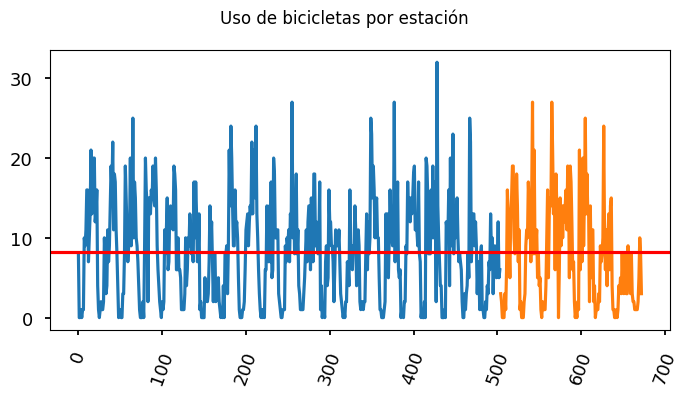

In [16]:
fig, ax = plt.subplots(1, 1, figsize=(7, 4))
ax.plot(X_train.index, y_train)
ax.plot(X_test.index, y_test)
ax.axhline(y_train.mean(), color='r')
fig.suptitle("Uso de bicicletas por estación")
plt.xticks(rotation=70)
plt.show()

# Aprendizaje supervisado para el modelado del uso de bicis

Variable que queremos modelar el comportamiento se le denomina variable de salida, respuesta, endógena o y.

Variable o conjunto de variables que se relacionan con la respuesta son variables de entrada, predictoras, explicativas, regresores, exógenas, o x_i



## Árboles de decisión

Son un conjunto de reglas ordenadas en forma de árbol jerárquico. Se aplica en aprendizaje supervisado.

Este árbol puede construirse de forma automática como parte de un proceso de aprendizaje automático a partir de datos.

El árbol está compuesto por la raíz, ramas, nodos y hojas:
- Raíz: nodo inicio o condición incial de un árbol.
- Nodo: condición establecida.
- Rama: respuesta a la condición aplicada en el nodo antecedente.
- Hoja: Fin del recorrido del árbol donde se define la decisión final

Las reglas pueden describirse como condiciones simples en base a un atributo o característica:
- Es fin de semana.
- La lluvia es mayor o igual.
- Hora es mayor de las 9 y menor o igual a 16 horas.

El cumplimiento o no de la condición hará que para tomar una decisión se deba recorrer una u otra rama (exhaustivo).

El recorrido de una rama completa concluye con el nodo hoja donde se toma la decisión final.

Esta decisión puede ser de tipo clasificación, etiqueta o nominal (disjuntas); o puede ser regresión, numérica o continua.

Existen varios algoritmos de partición para la creación de estos árboles: ID3, C4.5, CART, etc.

El árbol sólo aporta una solución, por tanto, las particiones deben ser exhaustivas y excluyentes.

El criterio de partición y el número de particiones son los parámetros a ajustar, en estos algoritmos, entre otros.

Debemos de tener en cuenta, como criterios, la expresividad de nuesto árbol y la complejidad para evitar sobre ajustes.

[Implementación en Scikit-Learn](https://scikit-learn.org/stable/modules/tree.html#tree-algorithms-id3-c4-5-c5-0-and-cart)


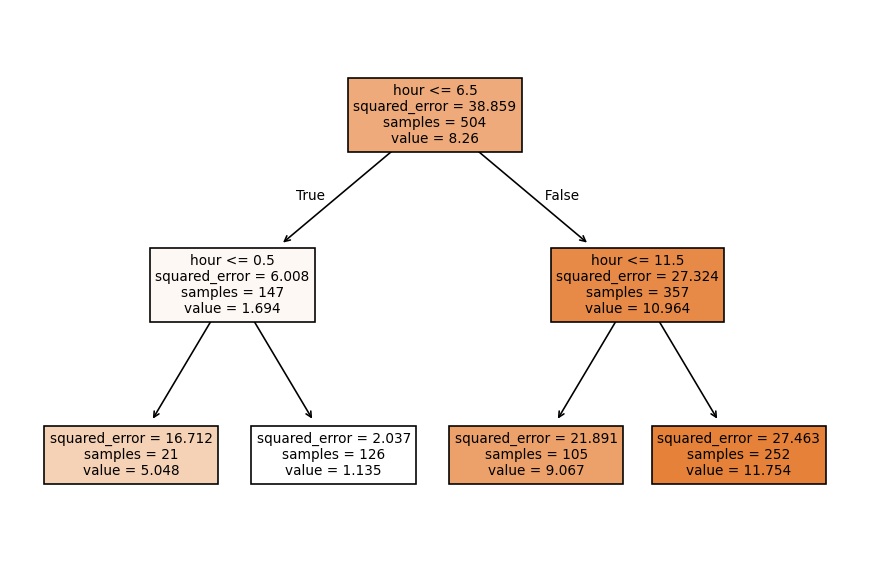

In [17]:
tree_reg = DecisionTreeRegressor(max_depth=2)
tree_reg.fit(X_train[['hora']], y_train)
fig, axes = plt.subplots(1,1,figsize = (3,2), dpi=300)
plot_tree(tree_reg, feature_names=['hour'], filled=True)
plt.show()


findfont: Font family 'Loma' not found.
findfont: Font family 'Loma' not found.
findfont: Font family 'Loma' not found.
findfont: Font family 'Loma' not found.
findfont: Font family 'Loma' not found.
findfont: Font family 'Loma' not found.
findfont: Font family 'Loma' not found.
findfont: Font family 'Loma' not found.
findfont: Font family 'Loma' not found.
findfont: Font family 'Loma' not found.
findfont: Font family 'Loma' not found.
findfont: Font family 'Loma' not found.
findfont: Font family 'Loma' not found.
findfont: Font family 'Loma' not found.
findfont: Font family 'Loma' not found.
findfont: Font family 'Loma' not found.
findfont: Font family 'Loma' not found.
findfont: Font family 'Loma' not found.
findfont: Font family 'Loma' not found.
findfont: Font family 'Loma' not found.
findfont: Font family 'Loma' not found.
findfont: Font family 'Loma' not found.
findfont: Font family 'Loma' not found.
findfont: Font family 'Loma' not found.
findfont: Font family 'Loma' not found.


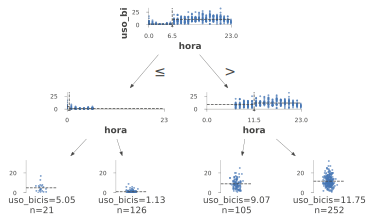

In [18]:
viz_rmodel = dtreeviz.model(model=tree_reg, tree_index=1,
                            X_train=X_train[['hora']], 
                            y_train=y_train, 
                            feature_names=['hora'], 
                            target_name='uso_bicis')
viz_rmodel.view(fontname='Loma')

In [19]:
# ver la fuente disponible, posibles problemas por fuente
print([f.name for f in matplotlib.font_manager.fontManager.ttflist])

['DejaVu Serif', 'STIXSizeTwoSym', 'cmss10', 'DejaVu Sans', 'DejaVu Sans Mono', 'STIXGeneral', 'STIXNonUnicode', 'DejaVu Serif', 'DejaVu Serif Display', 'STIXNonUnicode', 'DejaVu Sans', 'STIXSizeFiveSym', 'cmb10', 'DejaVu Serif', 'cmex10', 'STIXSizeTwoSym', 'STIXGeneral', 'DejaVu Sans Display', 'DejaVu Sans Mono', 'STIXSizeOneSym', 'cmr10', 'STIXNonUnicode', 'STIXNonUnicode', 'DejaVu Sans', 'STIXGeneral', 'cmsy10', 'cmmi10', 'DejaVu Serif', 'STIXSizeFourSym', 'DejaVu Sans Mono', 'STIXSizeThreeSym', 'cmtt10', 'DejaVu Sans Mono', 'STIXSizeOneSym', 'STIXGeneral', 'STIXSizeThreeSym', 'DejaVu Sans', 'STIXSizeFourSym', 'Consolas', 'Comic Sans MS', 'Cambria', 'Segoe UI', 'Microsoft PhagsPa', 'Courier New', 'Calibri', 'Segoe Print', 'Georgia', 'Microsoft YaHei', 'Tahoma', 'Segoe Script', 'Javanese Text', 'Trebuchet MS', 'MV Boli', 'Cambria', 'Palatino Linotype', 'Constantia', 'Segoe UI Emoji', 'Myanmar Text', 'Nirmala UI', 'Calibri', 'Microsoft Himalaya', 'Yu Gothic', 'Candara', 'Lucida Sans U

In [20]:
y_pred = tree_reg.predict(X_test[['hora']])
metricas_evaluacion(y_test, y_pred)

Mean Absolute Error: 3.491086691086691
Mean Squared Error: 22.3724097256698
Root Mean Squared Error: 4.729948173676938
r2_score: 0.4642175851789899
MAPE: 423415349581842.06


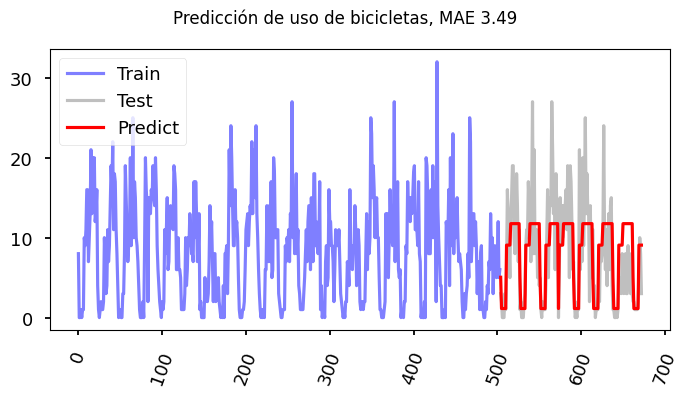

In [21]:
plot_train_test_predict(y_train, y_test, y_pred)

### Uso de todas las variables

In [22]:
df.columns

Index(['prec', 'vmax', 'vv', 'hr', 'ta', 'tpr', 'tamin', 'tamax', 'fecha',
       'uso_bici', 'name', 'hora', 'dia', 'mes', 'anio', 'dia_nombre',
       'dia_semana', 'findesemana'],
      dtype='object')

In [23]:
X = df.drop(labels=['fecha', 'uso_bici', 'name', 'dia_nombre'], axis=1)  # Variables que no queremos usar para predecir
y = df['uso_bici']
print(X.shape, y.shape)
res_split = train_test_split(X, y, random_state=22, shuffle=False)
X_train, X_test, y_train, y_test = res_split

(673, 14) (673,)


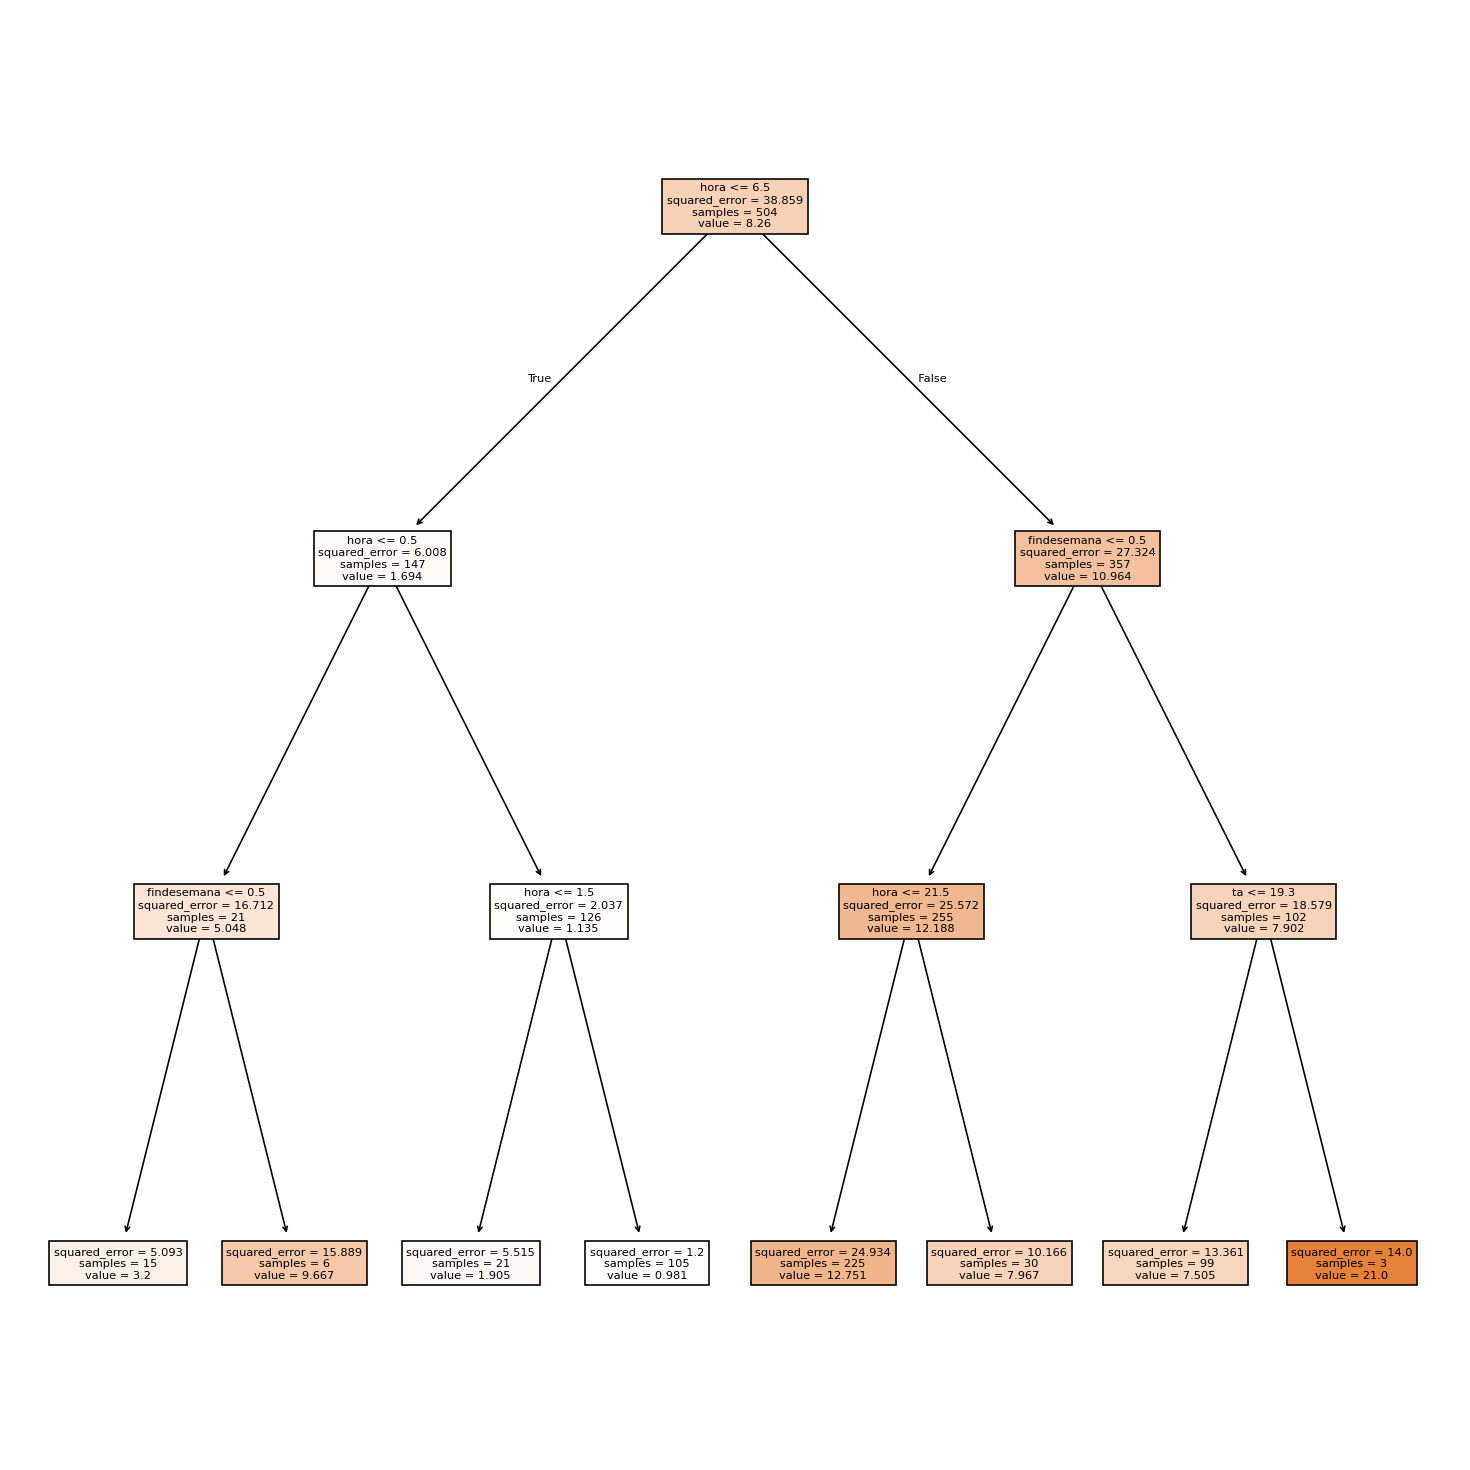

In [24]:
tree_reg = DecisionTreeRegressor(max_depth=3)
tree_reg.fit(X_train, y_train)
fig, axes = plt.subplots(1,1,figsize = (5, 5), dpi=300)
plot_tree(tree_reg, feature_names=X_train.columns, filled=True)
plt.show()

findfont: Font family 'Loma' not found.
findfont: Font family 'Loma' not found.
findfont: Font family 'Loma' not found.
findfont: Font family 'Loma' not found.
findfont: Font family 'Loma' not found.
findfont: Font family 'Loma' not found.
findfont: Font family 'Loma' not found.
findfont: Font family 'Loma' not found.
findfont: Font family 'Loma' not found.
findfont: Font family 'Loma' not found.
findfont: Font family 'Loma' not found.
findfont: Font family 'Loma' not found.
findfont: Font family 'Loma' not found.
findfont: Font family 'Loma' not found.
findfont: Font family 'Loma' not found.
findfont: Font family 'Loma' not found.
findfont: Font family 'Loma' not found.
findfont: Font family 'Loma' not found.
findfont: Font family 'Loma' not found.
findfont: Font family 'Loma' not found.
findfont: Font family 'Loma' not found.
findfont: Font family 'Loma' not found.
findfont: Font family 'Loma' not found.
findfont: Font family 'Loma' not found.
findfont: Font family 'Loma' not found.


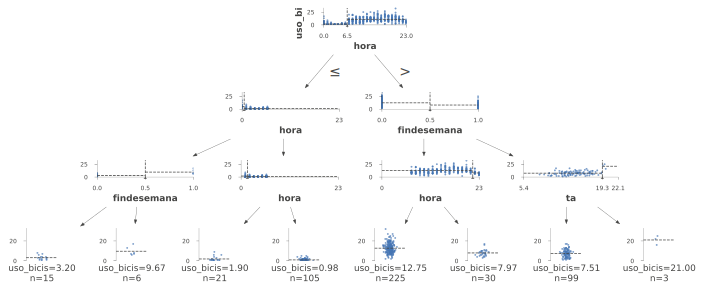

In [25]:
viz_rmodel = dtreeviz.model(model=tree_reg, tree_index=1,
                            X_train=X_train, 
                            y_train=y_train, 
                            feature_names=X_train.columns, 
                            target_name='uso_bicis')
viz_rmodel.view(fontname='Loma')

In [26]:
y_pred = tree_reg.predict(X_test)
metricas_evaluacion(y_test, y_pred)

Mean Absolute Error: 3.138918858918859
Mean Squared Error: 19.06552762711937
Root Mean Squared Error: 4.3664090082262526
r2_score: 0.54341197228414
MAPE: 365972987470739.0


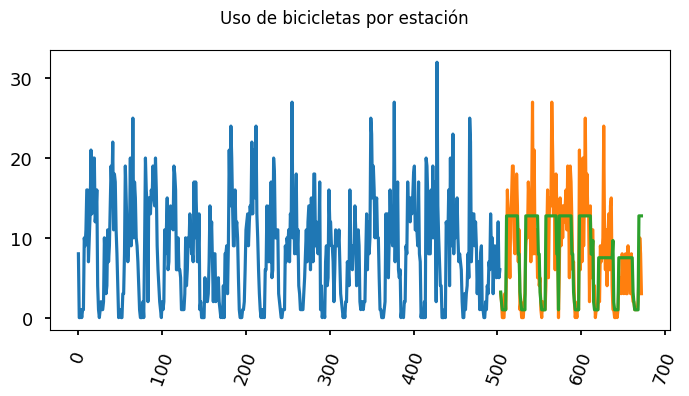

In [27]:
fig, ax = plt.subplots(1, 1, figsize=(7, 4))
ax.plot(X_train.index, y_train)
ax.plot(X_test.index, y_test)
ax.plot(X_test.index, y_pred)
fig.suptitle("Uso de bicicletas por estación")
plt.xticks(rotation=70)
plt.show()

In [28]:
tree_reg.feature_importances_

array([0.        , 0.        , 0.        , 0.        , 0.0445919 ,
       0.        , 0.        , 0.        , 0.82777578, 0.        ,
       0.        , 0.        , 0.        , 0.12763232])

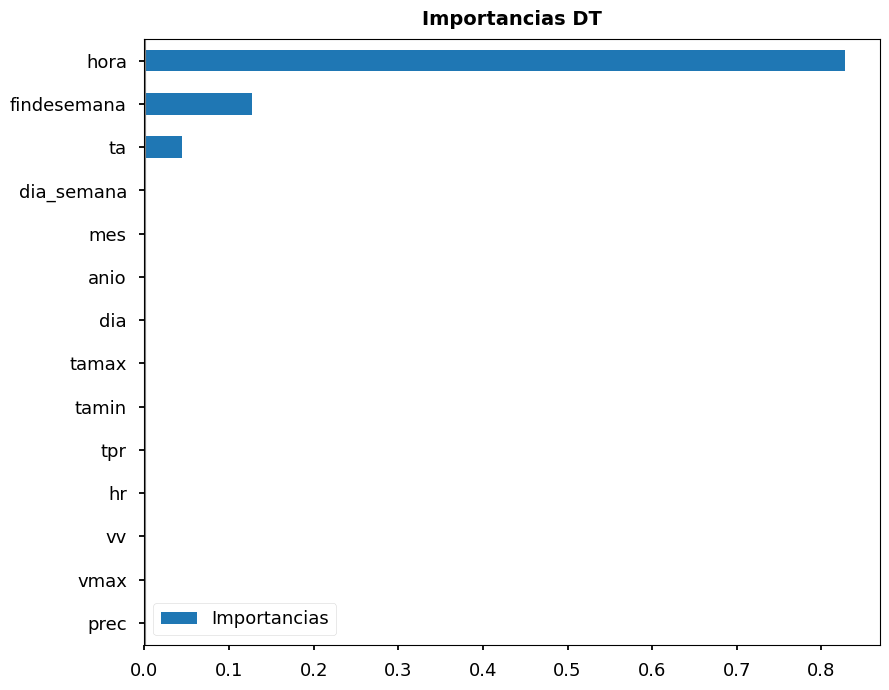

In [29]:
importances = pd.DataFrame(
    tree_reg.feature_importances_, columns=["Importancias"], index=X_train.columns
)

importances.sort_values('Importancias').plot(kind="barh", figsize=(9, 7))
plt.title("Importancias DT")
plt.axvline(x=0, color=".5")
plt.subplots_adjust(left=0.3)

## Regresión lineal

Dividimos los tipos de modelo de regresión en simple o múltiple.

Modelo de regresión lineal es aditivo en cuanto a las variables predictoras.

En casos de tener pocos ejemplos puede ser buena opción para generalizar el conocimiento.

Se puede hacer transformaciones sobre las variables originales mejorando los resultados.

Una de las transformaciones es la numerización de variables categóricas, como puede ser los días de la semana.


In [30]:
df.columns

Index(['prec', 'vmax', 'vv', 'hr', 'ta', 'tpr', 'tamin', 'tamax', 'fecha',
       'uso_bici', 'name', 'hora', 'dia', 'mes', 'anio', 'dia_nombre',
       'dia_semana', 'findesemana'],
      dtype='object')

In [31]:
# Ejemplo con statsmodels, resultados con enfoque estadístico
X_lm = sm.add_constant(X_train)
# Ajuste MMCC
model = sm.OLS(y_train, X_lm)
results = model.fit()
print(results.summary())

# Predicción
y_pred = results.predict(X_test)
# Evaluación
metricas_evaluacion(y_test, y_pred)

                            OLS Regression Results                            
Dep. Variable:               uso_bici   R-squared:                       0.477
Model:                            OLS   Adj. R-squared:                  0.464
Method:                 Least Squares   F-statistic:                     37.27
Date:                Thu, 01 May 2025   Prob (F-statistic):           1.79e-61
Time:                        15:20:41   Log-Likelihood:                -1474.3
No. Observations:                 504   AIC:                             2975.
Df Residuals:                     491   BIC:                             3029.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
prec            0.4773      0.294      1.623      

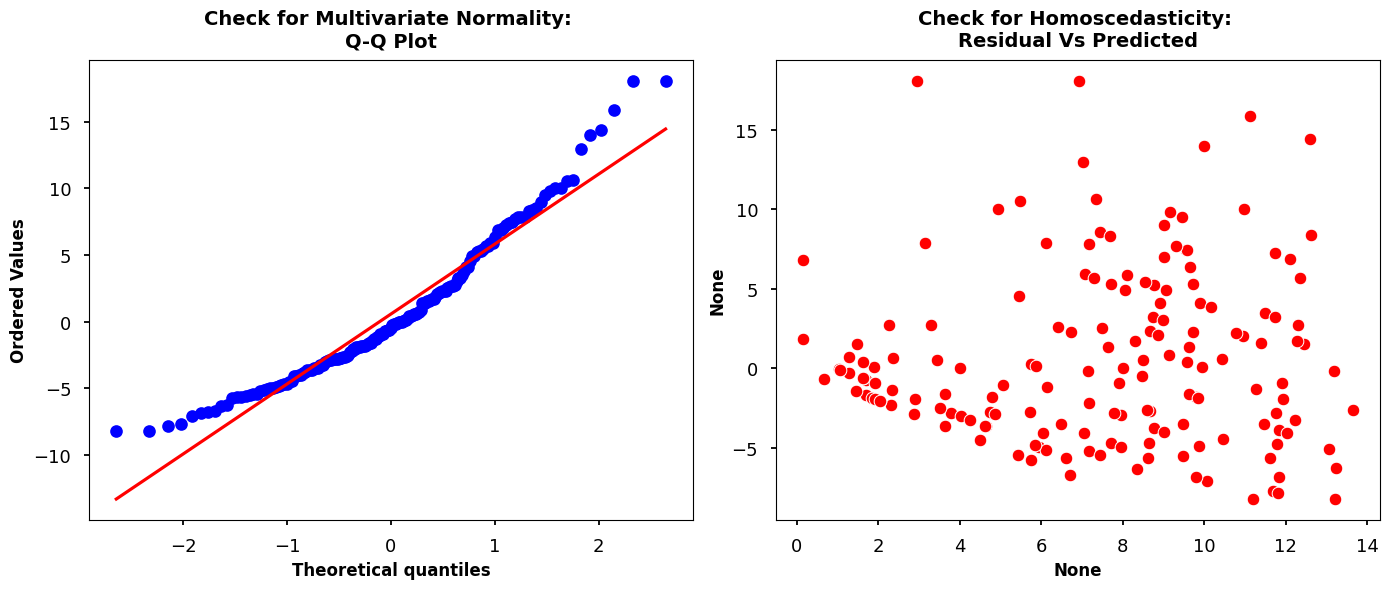

In [32]:
# Quantile-Quantile plot 
f,ax = plt.subplots(1,2,figsize=(14,6))
_,(_,_,r)= sp.stats.probplot((y_test - y_pred),fit=True,plot=ax[0])
ax[0].set_title('Check for Multivariate Normality: \nQ-Q Plot')

#Check for Homoscedasticity
sns.scatterplot(y = (y_test - y_pred), x= y_pred, ax = ax[1],color='r') 
ax[1].set_title('Check for Homoscedasticity: \nResidual Vs Predicted');

### Regresión lineal con Scikit Learn

In [33]:
from sklearn.preprocessing import PolynomialFeatures

In [34]:
df.columns

Index(['prec', 'vmax', 'vv', 'hr', 'ta', 'tpr', 'tamin', 'tamax', 'fecha',
       'uso_bici', 'name', 'hora', 'dia', 'mes', 'anio', 'dia_nombre',
       'dia_semana', 'findesemana'],
      dtype='object')

In [39]:
X = df.drop(labels=['fecha', 'name', 'dia_nombre', 'uso_bici', 'mes', 'anio'], axis=1)
X = df.loc[:, ['findesemana','dia_semana', 'hora', 'tamax', 'ta', 'tamin', 'vmax', 'prec']]
y = df['uso_bici']
# Transformaciones polinimicas en las variables predictoras
# poly_features = PolynomialFeatures(degree=3, include_bias=False)
# X = poly_features.fit_transform(X)
print(X.shape, y.shape)
res_split = train_test_split(X, y, random_state=22, shuffle=False)
X_train, X_test, y_train, y_test = res_split

(673, 8) (673,)


In [40]:
# Hay disponibles otros métodos de regresión lineal: ElasticNet, BayesianRidge...
reg = linear_model.LinearRegression().fit(X_train, y_train)
y_pred = reg.predict(X_test)
metricas_evaluacion(y_test, y_pred)

Mean Absolute Error: 3.81677746029235
Mean Squared Error: 24.86428855285584
Root Mean Squared Error: 4.986410387528872
r2_score: 0.4045411859067559
MAPE: 1255460010991750.8


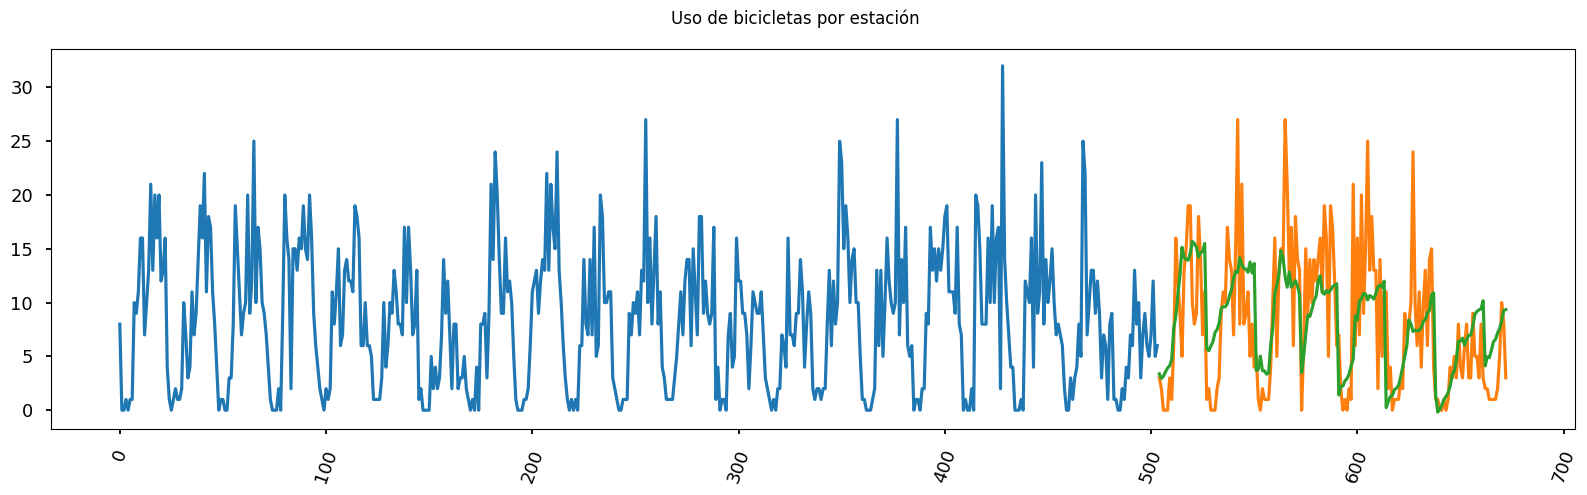

In [41]:
fig, ax = plt.subplots(1, 1, figsize=(16, 5))
ax.plot(X_train.index, y_train)
ax.plot(X_test.index, y_test)
ax.plot(X_test.index, y_pred)
fig.suptitle("Uso de bicicletas por estación")
plt.xticks(rotation=70)
plt.show()

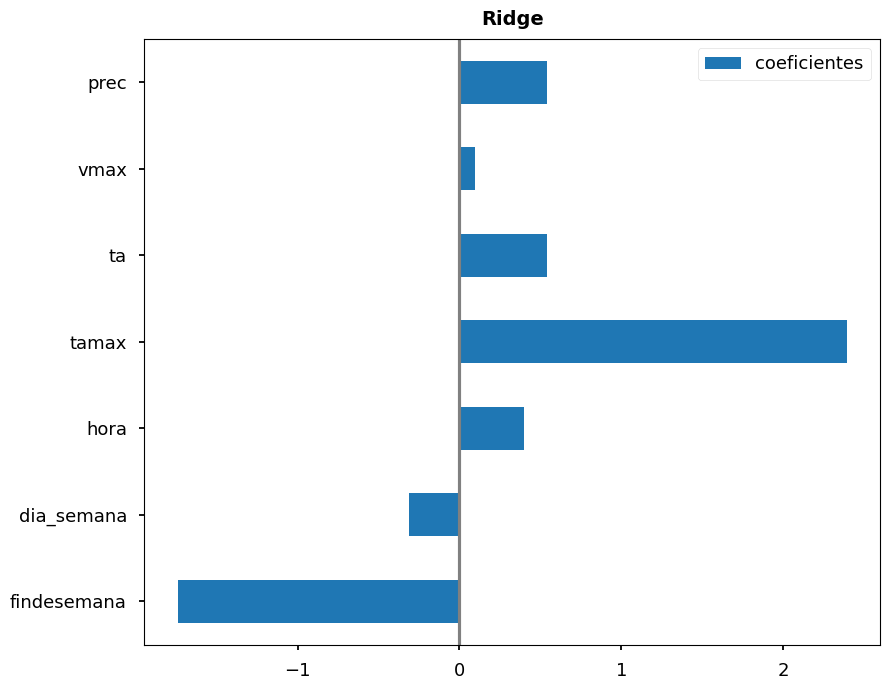

In [ ]:
coefs = pd.DataFrame(
    reg.coef_, columns=["coeficientes"], index=X_train.columns
)

coefs.plot(kind="barh", figsize=(9, 7))
plt.title("Ridge")
plt.axvline(x=0, color=".5")
plt.subplots_adjust(left=0.3)

# Conclusiones

- Debe haber una experimentación buscando optimizar las métricas
- La visualización es clave para entender el modelo y el comportamiento en la predicción